In [ ]:
### 初始化模型

In [7]:
import config
from models import crnn_model, text_model
import sys
import cv2
import time
import matplotlib.pyplot as plt
from PIL import Image

net_text = text_model.TEXT_NET()
net_ocr = crnn_model.CRNN_NET()

cpu
loading weights:weights/text/text.pth Done
loading weights:weights/ocr/chinese/ocr_best.pth Done


{'text': '校验码:05988476341653155207', 'prob': 1.0}


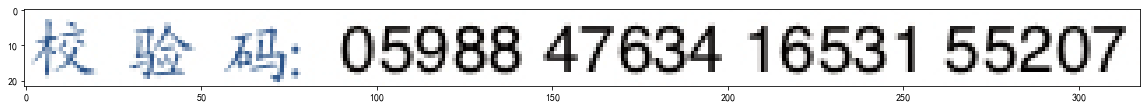

In [8]:
#img = Image.open('test/dd.jpg')
img = cv2.imread('test/dd.jpg')
img = Image.fromarray(img)
res = net_ocr.predict(img)
print(res)

plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()

净买入(元) [1127, 523, 1348, 520, 1348, 570, 1127, 573] 0.88
大盘调整如何把握逆势上涨机会?立即开户体验智买卖信号>> [96, 38, 906, 38, 906, 81, 96, 82] 0.99
融资 [635, 463, 734, 460, 736, 507, 636, 510] 0.97
4.17 [366, 581, 466, 584, 464, 626, 365, 622] 0.97
1840.18万 [882, 581, 1078, 581, 1078, 626, 882, 627] 0.88
余额合计2.6亿元。 [0, 325, 293, 326, 293, 375, 0, 374] 0.98
余额占流通市值比例买入额(元) [243, 521, 833, 520, 833, 572, 243, 573] 0.93
较前一日下降1.62%。 [0, 161, 342, 161, 342, 205, 0, 205] 0.97
余额(元) [23, 523, 219, 521, 219, 570, 23, 572] 0.85
偿还额(元) [857, 521, 1078, 523, 1078, 570, 857, 570] 0.88
1414.87万 [636, 580, 833, 581, 833, 627, 636, 626] 0.84
迪普科技融资融券交易明细(09-07) [0, 397, 489, 395, 489, 438, 0, 440] 0.96
融券方面,融券卖出0股,融券偿还0股,融券余量2.33万股,融券余额104.31万元。融资融券 [0, 279, 1379, 279, 1379, 326, 0, 326] 0.99
融资方面,当日融资买入1414.87万元,融资偿还1840.18万元,融资净偿还425.31万元。 [47, 231, 1373, 231, 1373, 280, 47, 279] 0.97
迪普科技融资融券信息显示,2020年9月7日融资净偿还425.31万元;融资余额2.58亿元, [47, 113, 1373, 110, 1373, 158, 47, 159] 0.96
一425.31万 [1150, 584, 1324, 580, 1325, 622, 

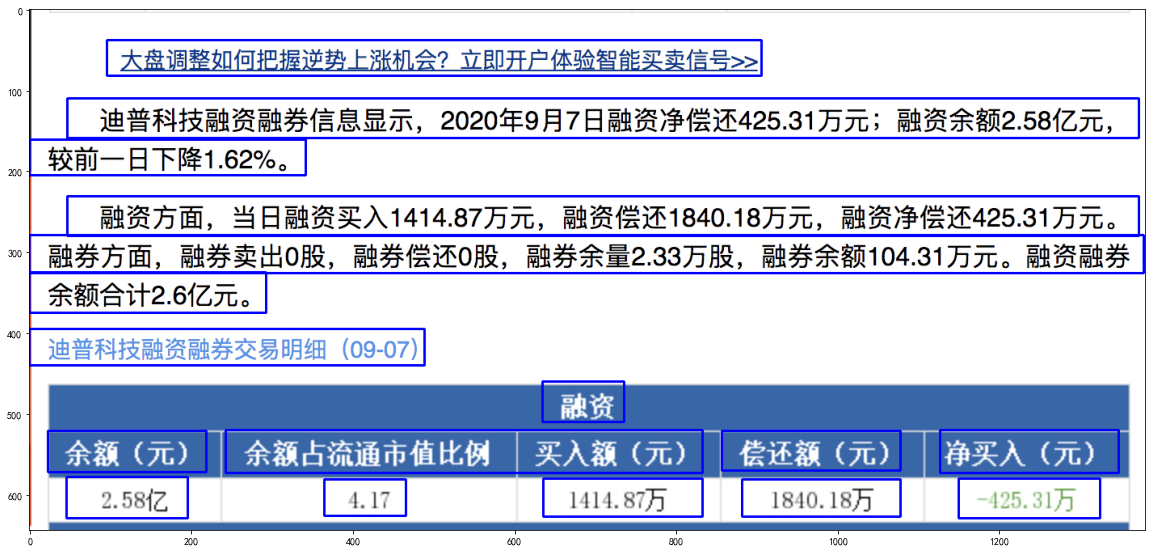

In [9]:

img = cv2.imread('test/demo_text_ocr.png')
boxes, scores = net_text.predict(img)

im = Image.fromarray(img)
result = []
for i, box in enumerate(boxes):
    if scores[i] > config.TEXT_LINE_SCORE:
            tmpImg = net_text.rotate_cut_img(
                im, box, leftAdjust=0.01, rightAdjust=0.01)
            text = net_ocr.predict(tmpImg)
            if text['text'] != '':
                text['box'] = [int(x) for x in box]
                text['textprob'] = round(float(scores[i]), 2)
                print(text['text'], text['box'], text['textprob'])
                result.append(text)
img_box = net_text.draw_boxes(img, boxes)
box_img_path = "test/pred_box.jpg"
cv2.imwrite(box_img_path, img_box)
plt.figure(figsize=(20,20))
plt.imshow(img_box[:,:,(2,1,0)])
plt.show()

#result = sorted(result, key=lambda x: sum(x['box'][1::2]))

In [10]:
import ocr_main
import cv2
ocr = ocr_main.OCR()

cpu
loading weights:weights/text/text.pth Done
loading weights:weights/ocr/chinese/ocr_best.pth Done


In [11]:
img = cv2.imread('test/dd.jpg')
res = ocr.predict_ocr(img)
print(res)

{'text': '校验码:05988476341653155207', 'prob': 1.0}


In [12]:
img = cv2.imread('test/demo_text_ocr.png')
boxes, scores = ocr.predict_text(img)
print(boxes.shape, scores.shape)

(17, 8) (17,)


In [13]:
import json
img = cv2.imread('test/demo_text_ocr.png')
res = ocr.predict(img, 'test/pred.jpg')
print(json.dumps(res,indent=4,ensure_ascii=False ))

[
    {
        "text": "大盘调整如何把握逆势上涨机会?立即开户体验智买卖信号>>",
        "prob": 1.0,
        "box": [
            96,
            38,
            906,
            38,
            906,
            81,
            96,
            82
        ],
        "textprob": 0.99
    },
    {
        "text": "迪普科技融资融券信息显示,2020年9月7日融资净偿还425.31万元;融资余额2.58亿元,",
        "prob": 1.0,
        "box": [
            47,
            113,
            1373,
            110,
            1373,
            158,
            47,
            159
        ],
        "textprob": 0.96
    },
    {
        "text": "较前一日下降1.62%。",
        "prob": 1.0,
        "box": [
            0,
            161,
            342,
            161,
            342,
            205,
            0,
            205
        ],
        "textprob": 0.97
    },
    {
        "text": "融资方面,当日融资买入1414.87万元,融资偿还1840.18万元,融资净偿还425.31万元。",
        "prob": 1.0,
        "box": [
            47,
            231,
            1373,
            231,
            13